### Nicolas Bataille
07/11/2021\
Student number : 2131029

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

2021-11-08 14:48:21.546412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 14:48:21.546458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Task 4.1

In [2]:
wineData = np.load('Datas/wineData.npy')
wineLabels = np.load('Datas/wineLabels.npy')

wineDataTrain, wineDataTest, wineLabelsTrain, wineLabelsTest = train_test_split(wineData, wineLabels, test_size=0.2)

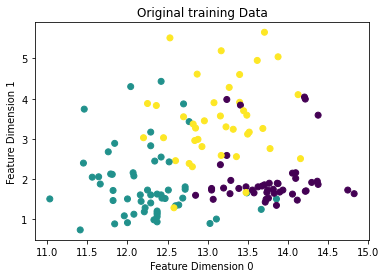

In [3]:
plt.figure()
plt.scatter(wineDataTrain[:,0], 
            wineDataTrain[:,1],
            c = wineLabelsTrain)
plt.title('Original training Data')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()

#### Data Standardisation

In [4]:
standardScaler = StandardScaler()

standardScaler.fit(wineDataTrain)

wineDataTrain = standardScaler.transform(wineDataTrain)
wineDataTest = standardScaler.transform(wineDataTest)

#### Creating and training a multiclass SVM

In [5]:
SVM = SVC()
SVM.fit(wineDataTrain, wineLabelsTrain)

SVC()

#### Predicting labels on the testing set


In [6]:
wineDataTestPrediction = SVM.predict(wineDataTest)

winePredictionAccuracy = SVM.score(wineDataTest, wineLabelsTest)
print(f'The model accuracy on the testing data is {winePredictionAccuracy*100:0.2f}%')

The model accuracy on the testing data is 91.67%


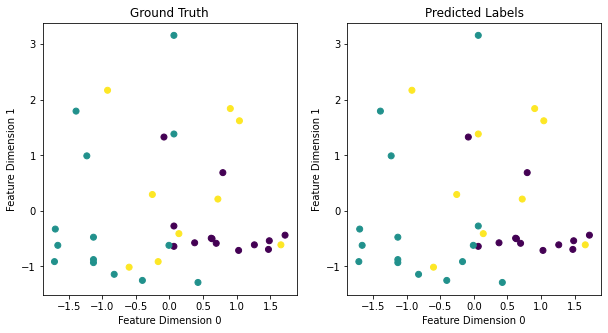

In [7]:
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineLabelsTest)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.subplot(122)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineDataTestPrediction)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

### Task 4.2

### Creating a Tensorflow Fully Connected Neural Network with a Sequential Model

In [35]:
outputSize = len(np.unique(wineLabelsTrain))

# note: Dense layers are fully connected layers
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(20, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(outputSize, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

### Training the model on the data

In [36]:
history = model.fit(wineDataTrain, 
            wineLabelsTrain, 
            epochs = 100,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 43ms/step - loss: 1.3903 - sparse_categorical_accuracy: 0.1681 - val_loss: 1.1881 - val_sparse_categorical_accuracy: 0.2414
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3208 - sparse_categorical_accuracy: 0.1947 - val_loss: 1.1448 - val_sparse_categorical_accuracy: 0.2414
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1.2595 - sparse_categorical_accuracy: 0.2212 - val_loss: 1.1064 - val_sparse_categorical_accuracy: 0.2759
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.2062 - sparse_categorical_accuracy: 0.2212 - val_loss: 1.0724 - val_sparse_categorical_accuracy: 0.2759
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1578 - sparse_categorical_accuracy: 0.2301 - val_loss: 1.0428 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1171 - sparse_categorical_accuracy: 0.

Epoch 47/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4560 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.5101 - val_sparse_categorical_accuracy: 0.9655
Epoch 48/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4473 - sparse_categorical_accuracy: 0.8850 - val_loss: 0.5005 - val_sparse_categorical_accuracy: 0.9655
Epoch 49/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4388 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.4918 - val_sparse_categorical_accuracy: 1.0000
Epoch 50/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4308 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.4830 - val_sparse_categorical_accuracy: 1.0000
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4224 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.4735 - val_sparse_categorical_accuracy: 1.0000
Epoch 52/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4146 - sparse_categorical_accurac

Epoch 93/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1549 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1737 - val_sparse_categorical_accuracy: 0.9655
Epoch 94/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1515 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1698 - val_sparse_categorical_accuracy: 0.9655
Epoch 95/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1480 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1660 - val_sparse_categorical_accuracy: 0.9655
Epoch 96/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1625 - val_sparse_categorical_accuracy: 0.9655
Epoch 97/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1414 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1592 - val_sparse_categorical_accuracy: 0.9655
Epoch 98/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1384 - sparse_categorical_accuracy: 

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Get the predicted labels on the Testing dataset
SVMPredict = model.predict(wineDataTest)
# Get the loss and accuracy of the model on the Testing dataset
results = model.evaluate(wineDataTest, wineLabelsTest)
print(f'The accuracy is {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 2ms/step - loss: 0.2353 - sparse_categorical_accuracy: 0.9167
The accuracy is 91.67%


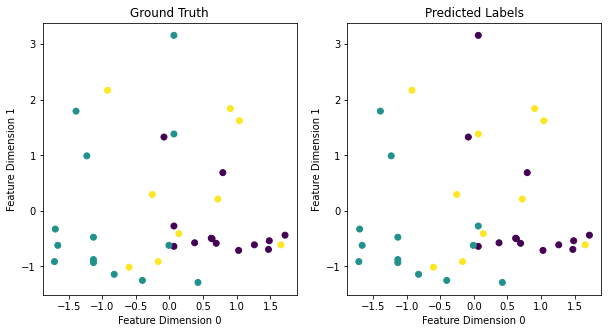

In [39]:
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineLabelsTest)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.subplot(122)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = np.argmax(SVMPredict, axis = 1))
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

#### Plotting the accuracy and the loss of our fitted model

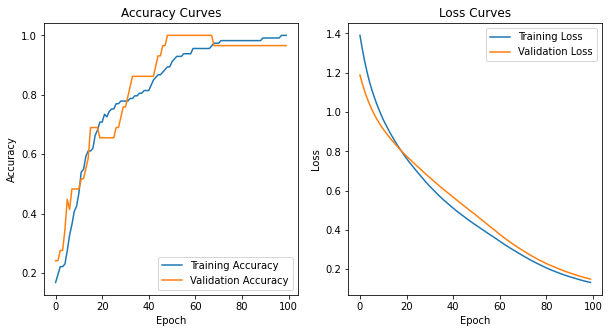

In [40]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()